In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv(" Data Science Intern Challenge .csv")
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Any missing entries

In [15]:
data.isnull().values.any()

False

It has been reported that the'Average Order Value('AOV')is $3145.13. Lets Confirm

In [16]:
data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

By observing the statistics of order_amount column,its clear that mean was considered of all the orders.There may be a reason like existence of outliers in dataset.Further , looking at the standarad deviation ,we can deduce that values on average are much farther away from the mean,making it poor estimate of AOV.

 The describe() function has also given us some tstas on the percentiles of the dataset,the values
    we can see that 75% of the data is belwo 390 ,and yet the AOV is well into thousands.Looking at min order of 90 vs max order of 704000 is so much farther from any of the other values,it has the potential to say the data is heavily upward in thiscase. Since the mean is susceptible to large or small outliers which can drastically affect its value,a much better estimate would reside in the median of the column.  

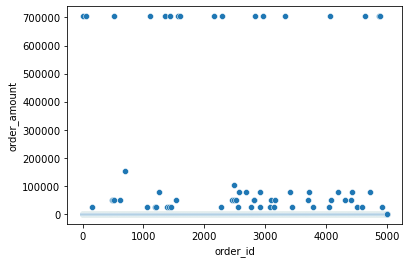

In [17]:
ax=sns.scatterplot(x=data['order_id'],y=data['order_amount'])

By the plot we can say that some orders have multiple sneakers in them.
Some sneakers are valued very highly.

In [18]:
round(data.order_amount.median(),2)

284.0

The median value is just $284 while the average far exceed(11X)the median.Indiactive of outliers in the data and a skewed distribution.

Instead of 'AOV' to evaluate sneaker price."AOV/item"should be the average metric to be used.To get this metric,order amount must be divided with the number of items in each other.

Calculate AOV per sneaker.

In [19]:
data['order_value_per_item']=data['order_amount']/data['total_items']
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_value_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [20]:
round(data.order_value_per_item.mean(),2)

387.74

Thus,the average sneaker value is $387.74 

In [21]:
data.order_value_per_item.describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: order_value_per_item, dtype: float64

By the observation it is clear that Sneakers are priced high($25,725),which makes the distribution skewed.


Metric suitable for this dataset :In skewed distribution,instead of average ,Medains are better metric to report .

In this case ,we will need to evaluate the frequency weighted median of sample (i.e.50% weighted percentile)is calculated

In [25]:
data.sort_values('order_value_per_item',inplace=True)
cummilative_sum=data.total_items.cumsum()
cutoff=data.total_items.sum()/2.0
weighted_median=data.order_value_per_item[cummilative_sum>=cutoff].iloc[0]
print(weighted_median)

352.0


Hence,the order size weighted median sneaker value is $352.0